In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("./data/944.csv")
df

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,...,vv,TMP,HR,PRB,RS,LL,BEN,TOL,MXIL,PM25
0,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,24,2.0,1.0,11.0,NaN,...,1.59,14.1,75.0,1015.0,56.0,0.0,0.04,0.03,0.03,11.0
1,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,23,5.0,1.0,8.0,NaN,...,2.22,14.1,73.0,1015.0,56.0,0.0,0.02,0.02,0.03,10.0
2,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,22,2.0,1.0,6.0,NaN,...,1.86,14.6,69.0,1014.0,56.0,0.0,0.02,0.02,0.03,12.0
3,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,21,1.0,3.0,13.0,NaN,...,2.11,17.7,46.0,1014.0,56.0,0.0,0.02,0.05,0.03,14.0
4,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,20,1.0,1.0,10.0,NaN,...,2.51,20.1,29.0,1012.0,56.0,0.0,0.02,0.02,0.03,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,5,4.0,2.0,22.0,0.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43796,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,4,3.0,3.0,28.0,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43797,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,3,4.0,13.0,31.0,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43798,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,2,3.0,5.0,35.0,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = df.drop(["dd","vv","TMP","HR","PRB", "RS", "LL","BEN","TOL","MXIL"], axis= 1)
df2

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
0,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,24,2.0,1.0,11.0,NaN,29.0,54.0,11.0
1,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,23,5.0,1.0,8.0,NaN,32.0,66.0,10.0
2,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,22,2.0,1.0,6.0,NaN,33.0,78.0,12.0
3,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,21,1.0,3.0,13.0,NaN,36.0,67.0,14.0
4,1,Estación Avenida Constitución,43.529806,-5.673428,2022-12-31,20,1.0,1.0,10.0,NaN,39.0,71.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,5,4.0,2.0,22.0,0.49,26.0,3.0,NaN
43796,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,4,3.0,3.0,28.0,0.51,31.0,4.0,NaN
43797,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,3,4.0,13.0,31.0,0.69,50.0,2.0,NaN
43798,4,Estación Avenida Castilla,43.537940,-5.645951,2022-01-01,2,3.0,5.0,35.0,0.65,42.0,4.0,NaN


In [4]:
dfestacion2 = df2[df2["Estación"] == 2]
dfestacion2

,Estación,Título,latitud,longitud,Fecha,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
26280,2,Estación Avenida Argentina,43.538869,-5.69893,2022-12-31,24,3.0,1.0,9.0,0.11,34.0,56.0,NaN
26281,2,Estación Avenida Argentina,43.538869,-5.69893,2022-12-31,23,3.0,1.0,6.0,0.23,26.0,67.0,NaN
26282,2,Estación Avenida Argentina,43.538869,-5.69893,2022-12-31,22,3.0,1.0,2.0,0.10,25.0,74.0,NaN
26283,2,Estación Avenida Argentina,43.538869,-5.69893,2022-12-31,21,3.0,2.0,8.0,0.14,48.0,69.0,NaN
26284,2,Estación Avenida Argentina,43.538869,-5.69893,2022-12-31,20,2.0,1.0,7.0,0.13,32.0,67.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2,Estación Avenida Argentina,43.538869,-5.69893,2022-01-01,5,29.0,4.0,34.0,0.58,100.0,13.0,NaN
35036,2,Estación Avenida Argentina,43.538869,-5.69893,2022-01-01,4,17.0,1.0,26.0,0.25,44.0,17.0,NaN
35037,2,Estación Avenida Argentina,43.538869,-5.69893,2022-01-01,3,24.0,1.0,24.0,0.58,79.0,22.0,NaN
35038,2,Estación Avenida Argentina,43.538869,-5.69893,2022-01-01,2,15.0,1.0,22.0,0.16,45.0,29.0,NaN


In [5]:
media_so2 = dfestacion2["SO2"].mean()
print("Media del Dióxido de Azufre de la estacion 2:", round(media_so2, 2))

media_no = dfestacion2["NO"].mean()
print("Media del Óxido Nítrico de la estacion 2:", round(media_no, 2))

media_no2 = dfestacion2["NO2"].mean()
print("Media del Dióxido de Nitrógeno de la estacion 2:", round(media_no2, 2))

media_co = dfestacion2["CO"].mean()
print("Media del Monóxido de carbono de la estacion 2:", round(media_co, 2))

media_pm10 = dfestacion2["PM10"].mean()
print("Media de partículas sólidas en el aire de hasta 10 micras de la estacion 2:", round(media_pm10, 2))

media_o3 = dfestacion2["O3"].mean()
print("Media del Ozono de la estacion 2:", round(media_o3, 2))

media_pm25 = dfestacion2["PM25"].mean()
print("Media de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2:", round(media_pm25, 2))

Media del Dióxido de Azufre de la estacion 2: 4.41
Media del Óxido Nítrico de la estacion 2: 7.08
Media del Dióxido de Nitrógeno de la estacion 2: 19.38
Media del Monóxido de carbono de la estacion 2: 0.26
Media de partículas sólidas en el aire de hasta 10 micras de la estacion 2: 37.82
Media del Ozono de la estacion 2: 39.24
Media de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2: nan


In [6]:
moda_so2 = dfestacion2["SO2"].mode()
print("Moda del Dióxido de Azufre de la estacion 2:", round(moda_so2, 2))

moda_no = dfestacion2["NO"].mode()
print("Moda del Óxido Nítrico de la estacion 2:", round(moda_no, 2))

moda_no2 = dfestacion2["NO2"].mode()
print("Moda del Dióxido de Nitrógeno de la estacion 2:", round(moda_no2, 2))

moda_co = dfestacion2["CO"].mode()
print("Moda del Monóxido de carbono de la estacion 2:", round(moda_co, 2))

moda_pm10 = dfestacion2["PM10"].mode()
print("Moda de partículas sólidas en el aire de hasta 10 micras de la estacion 2:", round(moda_pm10, 2))

moda_o3 = dfestacion2["O3"].mode()
print("Moda del Ozono de la estacion 2:", round(moda_o3, 2))

moda_pm25 = dfestacion2["PM25"].mode()
print("Moda de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2:", round(moda_pm25, 2))

Moda del Dióxido de Azufre de la estacion 2: 0    2.0
Name: SO2, dtype: float64
Moda del Óxido Nítrico de la estacion 2: 0    1.0
Name: NO, dtype: float64
Moda del Dióxido de Nitrógeno de la estacion 2: 0    8.0
Name: NO2, dtype: float64
Moda del Monóxido de carbono de la estacion : 0    0.1
Name: CO, dtype: float64
Moda de partículas sólidas en el aire de hasta 10 micras de la estacion 2: 0    28.0
Name: PM10, dtype: float64
Moda del Ozono de la estacion 2: 0    10.0
Name: O3, dtype: float64
Moda de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2: Series([], Name: PM25, dtype: float64)


In [7]:
mediana_so2 = dfestacion2["SO2"].median()
print("Mediana del Dióxido de Azufre de la estacion 2:", round(mediana_so2, 2))

mediana_no = dfestacion2["NO"].median()
print("Mediana del Óxido Nítrico de la estacion 2:", round(mediana_no, 2))

mediana_no2 = dfestacion2["NO2"].median()
print("Mediana del Dióxido de Nitrógeno de la estacion 2:", round(mediana_no2, 2))

mediana_co = dfestacion2["CO"].median()
print("Mediana del Monóxido de carbono de la estacion 2:", round(mediana_co, 2))

mediana_pm10 = dfestacion2["PM10"].median()
print("Mediana de partículas sólidas en el aire de hasta 10 micras de la estacion 2:", round(mediana_pm10, 2))

mediana_o3 = dfestacion2["O3"].median()
print("Mediana del Ozono de la estacion 2:", round(mediana_o3, 2))

mediana_pm25 = dfestacion2["PM25"].median()
print("Mediana de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2:", round(mediana_pm25, 2))

Mediana del Dióxido de Azufre de la estacion 2: 3.0
Mediana del Óxido Nítrico de la estacion 2: 2.0
Mediana del Dióxido de Nitrógeno de la estacion 2: 16.0
Mediana del Monóxido de carbono de la estacion 2: 0.11
Mediana de partículas sólidas en el aire de hasta 10 micras de la estacion 2: 32.0
Mediana del Ozono de la estacion 2: 39.0
Mediana de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2: nan


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
maximo_so2 = dfestacion2["SO2"].max()
fecha_max_so2 = df.loc[df["SO2"].idxmax(), "Fecha"]
print(f"Valor máximo del Dióxido de Azufre {round(maximo_so2, 2)} de la estacion 2 en: {fecha_max_so2}")

maximo_no = dfestacion2["NO"].max()
fecha_max_no = df.loc[df["NO"].idxmax(), "Fecha"]
print(f"Valor máximo del Óxido Nítrico {round(maximo_no, 2)} de la estacion 2 en: {fecha_max_no}")

maximo_no2 = dfestacion2["NO2"].max()
fecha_max_no2 = df.loc[df["NO2"].idxmax(), "Fecha"]
print(f"Valor máximo del Dióxido de Nitrógeno {round(maximo_no2, 2)} de la estacion 2 en: {fecha_max_no2}")

maximo_co = dfestacion2["CO"].max()
fecha_max_co = df.loc[df["CO"].idxmax(), "Fecha"]
print(f"Valor máximo del Monóxido de Carbono {round(maximo_co, 2)} de la estacion 2 en: {fecha_max_co}")

maximo_pm10 = dfestacion2["PM10"].max()
fecha_max_pm10 = df.loc[df["PM10"].idxmax(), "Fecha"]
print(f"Valor máximo de partículas sólidas en el aire de hasta 10 micras {round(maximo_pm10, 2)} de la estacion 2 en: {fecha_max_pm10}")

maximo_o3 = dfestacion2["O3"].max()
fecha_max_o3 = df.loc[df["O3"].idxmax(), "Fecha"]
print(f"Valor máximo del Ozono {round(maximo_o3, 2)} de la estacion 2 en: {fecha_max_o3}")

maximo_pm25 = dfestacion2["PM25"].max()
fecha_max_pm25 = df.loc[df["PM25"].idxmax(), "Fecha"]
print(f"Valor máximo de partículas sólidas en el aire de hasta 2,5 micras{round(maximo_pm25, 2)} de la estacion 2 en: {fecha_max_pm25}")

Valor máximo del Dióxido de Azufre 51.0 de la estacion 2 en: 2022-06-25
Valor máximo del Óxido Nítrico 330.0 de la estacion 2 en: 2022-12-30
Valor máximo del Dióxido de Nitrógeno 105.0 de la estacion 2 en: 2022-12-10
Valor máximo del Monóxido de Carbono 10.96 de la estacion 2 en: 2022-11-13
Valor máximo de partículas sólidas en el aire de hasta 10 micras 335.0 de la estacion 2 en: 2022-02-10
Valor máximo del Ozono 118.0 de la estacion 2 en: 2022-07-17
Valor máximo de partículas sólidas en el aire de hasta 2,5 micrasnan de la estacion 2 en: 2022-02-03


In [9]:
minimo_so2 = dfestacion2["SO2"].min()
print("Valor mínimo del Dióxido de Azufre de la estacion 2:", round(minimo_so2, 2))

minimo_no = dfestacion2["NO"].min()
print("Valor mínimo del Óxido Nítrico de la estacion 2:", round(minimo_no, 2))

minimo_no2 = dfestacion2["NO2"].min()
print("Valor mínimo del Dióxido de Nitrógeno de la estacion 2:", round(minimo_no2, 2))

minimo_co = dfestacion2["CO"].min()
print("Valor mínimo del Monóxido de carbono de la estacion 2:", round(minimo_co, 2))

minimo_pm10 = dfestacion2["PM10"].min()
print("Valor mínimo de partículas sólidas en el aire de hasta 10 micras de la estacion 2:", round(minimo_pm10, 2))

minimo_o3 = dfestacion2["O3"].min()
print("Valor mínimo del Ozono de la estacion 2:", round(minimo_o3, 2))

minimo_pm25 = dfestacion2["PM25"].min()
print("Valor mínimo de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2:", round(minimo_pm25, 2))

Valor mínimo del Dióxido de Azufre de la estacion 2: 1.0
Valor mínimo del Óxido Nítrico de la estacion 2: 1.0
Valor mínimo del Dióxido de Nitrógeno de la estacion 2: 2.0
Valor mínimo del Monóxido de carbono de la estacion 2: 0.1
Valor mínimo de partículas sólidas en el aire de hasta 10 micras de la estacion 2: 2.0
Valor mínimo del Ozono de la estacion 2: 0.0
Valor mínimo de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2: nan


In [10]:
desviacion_so2 = dfestacion2["SO2"].std()
print("Desviación del Dióxido de Azufre de la estacion 2:", round(desviacion_so2, 2))

desviacion_no = dfestacion2["NO"].std()
print("Desviación del Óxido Nítrico de la estacion 2:", round(desviacion_no, 2))

desviacion_no2 = dfestacion2["NO2"].std()
print("Desviación del Dióxido de Nitrógeno de la estacion 2:", round(desviacion_no2, 2))

desviacion_co = dfestacion2["CO"].std()
print("Desviación del Monóxido de carbono de la estacion 2:", round(desviacion_co, 2))

desviacion_pm10 = dfestacion2["PM10"].std()
print("Desviación de partículas sólidas en el aire de hasta 10 micras de la estacion 2:", round(desviacion_pm10, 2))

desviacion_o3 = dfestacion2["O3"].std()
print("Desviación del Ozono de la estacion 2:", round(desviacion_o3, 2))

desviacion_pm25 = dfestacion2["PM25"].std()
print("Desviación de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2:", round(desviacion_pm25, 2))

Desviación del Dióxido de Azufre de la estacion 2: 4.9
Desviación del Óxido Nítrico de la estacion 2: 14.23
Desviación del Dióxido de Nitrógeno de la estacion 2: 14.08
Desviación del Monóxido de carbono de la estacion 2: 0.55
Desviación de partículas sólidas en el aire de hasta 10 micras de la estacion 2: 22.71
Desviación del Ozono de la estacion 2: 21.23
Desviación de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2: nan


In [11]:
varianza_so2 = dfestacion2["SO2"].var()
print("Varianza del Dióxido de Azufre de la estacion 2:", round(varianza_so2, 2))

varianza_no = dfestacion2["NO"].var()
print("Varianza del Óxido Nítrico de la estacion 2:", round(varianza_no, 2))

varianza_no2 = dfestacion2["NO2"].var()
print("Varianza del Dióxido de Nitrógeno de la estacion 2:", round(varianza_no2, 2))

varianza_co = dfestacion2["CO"].var()
print("Varianza del Monóxido de carbono de la estacion 2:", round(varianza_co, 2))

varianza_pm10 = dfestacion2["PM10"].var()
print("Varianza de partículas sólidas en el aire de hasta 10 micras de la estacion 2:", round(varianza_pm10, 2))

varianza_o3 = dfestacion2["O3"].var()
print("Varianza del Ozono de la estacion 2:", round(varianza_o3, 2))

varianza_pm25 = dfestacion2["PM25"].var()
print("Varianza de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2:", round(varianza_pm25, 2))

Varianza del Dióxido de Azufre de la estacion 2: 23.99
Varianza del Óxido Nítrico de la estacion 2: 202.43
Varianza del Dióxido de Nitrógeno de la estacion 2: 198.16
Varianza del Monóxido de carbono de la estacion 2: 0.31
Varianza de partículas sólidas en el aire de hasta 10 micras de la estacion 2: 515.89
Varianza del Ozono de la estacion 2: 450.82
Varianza de partículas sólidas en el aire de hasta 2,5 micras de la estacion 2: nan


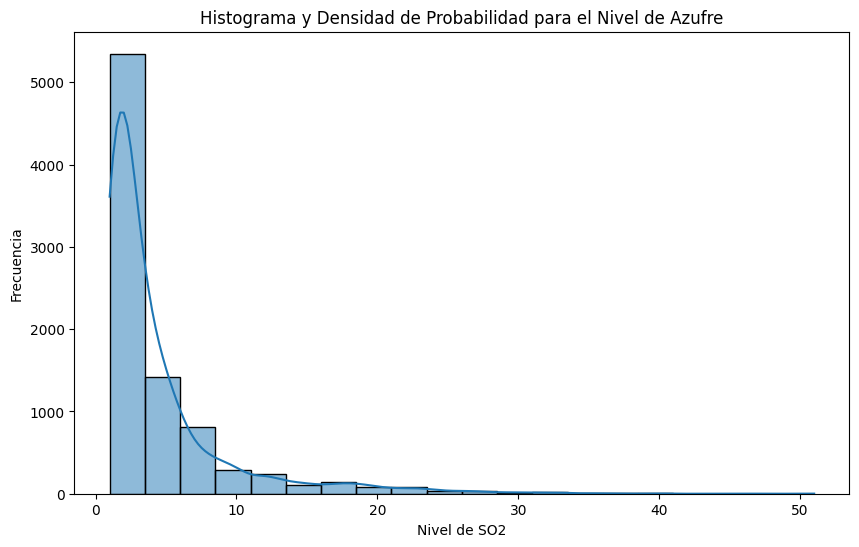

In [25]:
#AGENTE CONTAMINANTE DEL AIRE

plt.figure(figsize=(10, 6))
sns.histplot(dfestacion2["SO2"], kde=True, bins=20)

plt.title("Histograma y Densidad de Probabilidad para el Nivel de Azufre")
plt.xlabel("Nivel de SO2")
plt.ylabel("Frecuencia")

plt.show()

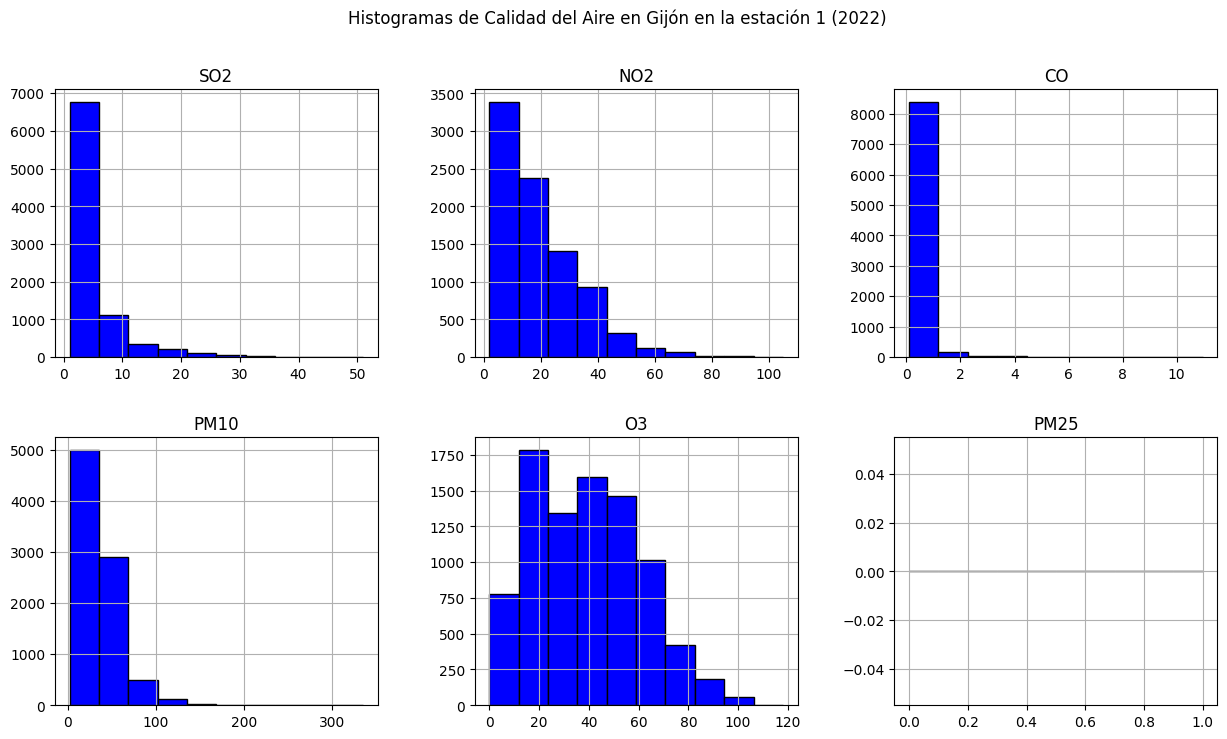

In [18]:
variables = ['SO2','NO2', 'CO', 'PM10', 'O3', 'PM25']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Histogramas de Calidad del Aire en Gijón en la estación 1 (2022)')

dfestacion2[variables].hist(ax=axes, bins=10, color='blue', edgecolor='black')

plt.show()

In [20]:
dfest2 = dfestacion2.drop(["Estación", "Título","Fecha","latitud", "longitud", "Periodo"], axis= 1)

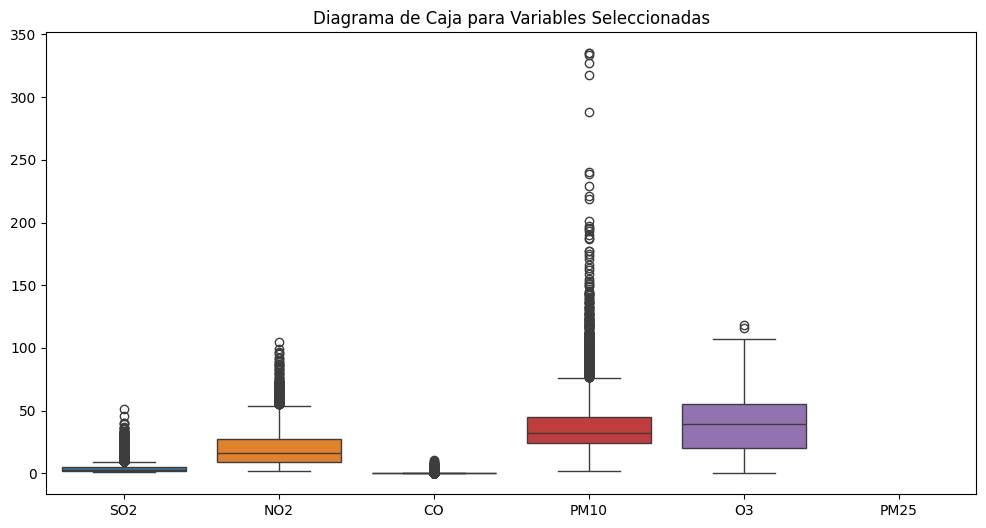

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfestacion2[variables])
plt.title('Diagrama de Caja para Variables Seleccionadas')
plt.show()

In [21]:
#ANÁLISIS BIVARIANTE

dfestacion2.describe()

,Estación,latitud,longitud,Periodo,SO2,NO,NO2,CO,PM10,O3,PM25
count,8760.0,8.760000e+03,8760.00000,8760.000000,8643.000000,8643.000000,8654.000000,8651.000000,8551.000000,8640.000000,0.0
mean,2.0,4.353887e+01,-5.69893,12.500000,4.414671,7.079023,19.380633,0.261810,37.820840,39.244907,NaN
std,0.0,1.421167e-14,0.00000,6.922582,4.897796,14.227834,14.076873,0.553409,22.713125,21.232614,NaN
min,2.0,4.353887e+01,-5.69893,1.000000,1.000000,1.000000,2.000000,0.100000,2.000000,0.000000,NaN
25%,2.0,4.353887e+01,-5.69893,6.750000,2.000000,1.000000,9.000000,0.100000,24.000000,20.000000,NaN
50%,2.0,4.353887e+01,-5.69893,12.500000,3.000000,2.000000,16.000000,0.110000,32.000000,39.000000,NaN
75%,2.0,4.353887e+01,-5.69893,18.250000,5.000000,6.000000,27.000000,0.200000,45.000000,55.000000,NaN
max,2.0,4.353887e+01,-5.69893,24.000000,51.000000,330.000000,105.000000,10.960000,335.000000,118.000000,NaN


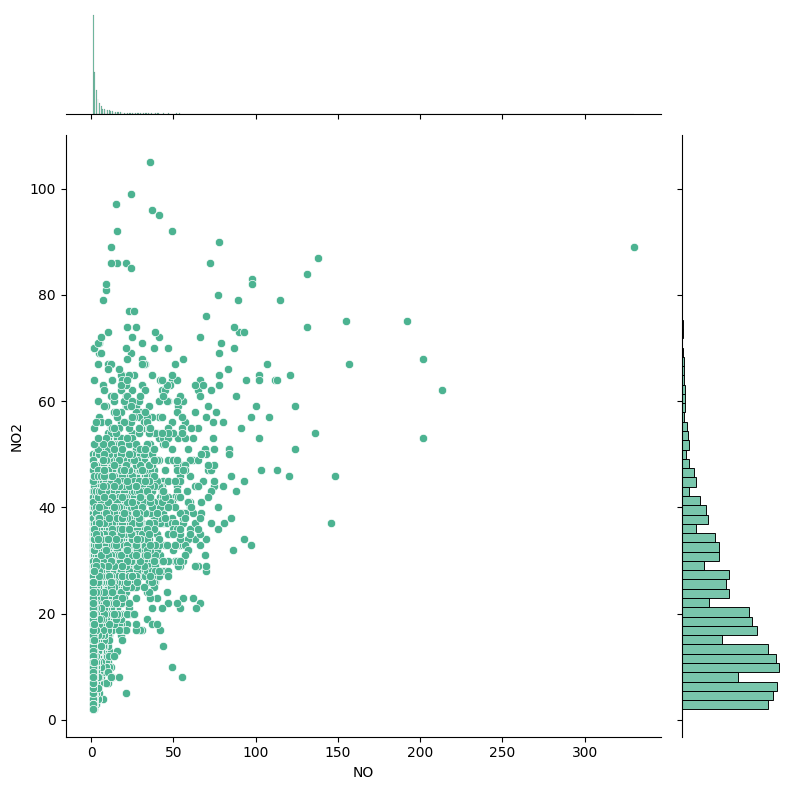

In [26]:
sns.jointplot(x=dfest2['NO'],
              y=dfest2['NO2'],
              color="#4CB391",
             height = 8);

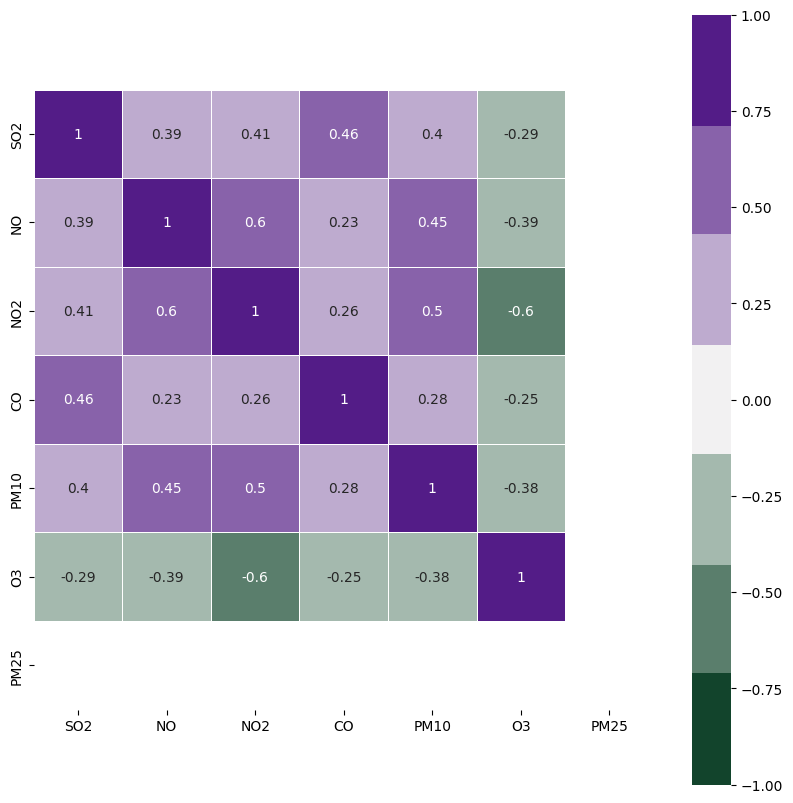

In [24]:
#ANÁLISIS MULTIVARIANTE

plt.figure(figsize=(10,10))
sns.heatmap(dfest2.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5, annot=True);